In [2]:
import pandas as pd
df = pd.read_csv('../data/Cleaned/reviews_cleaned.csv')

# Bank comparision

## based on sentiment label

<Axes: xlabel='bank'>

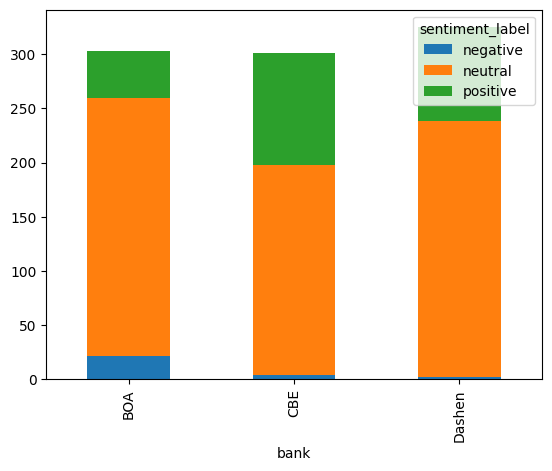

In [3]:
df.groupby(['bank', 'sentiment_label']).size().unstack().plot(kind='bar', stacked=True)

## based on rating

<Axes: xlabel='bank'>

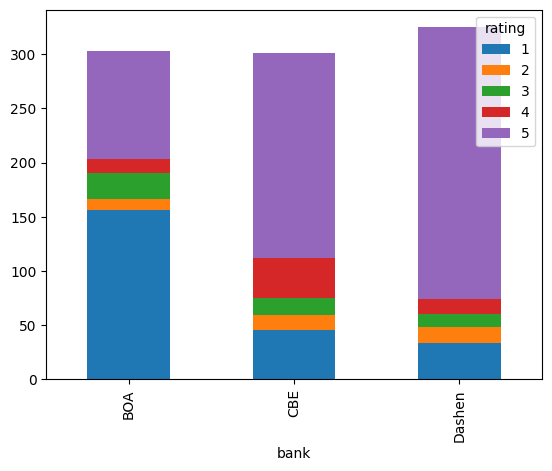

In [4]:
df.groupby(['bank', 'rating']).size().unstack().plot(kind='bar', stacked=True)

### avarage rating

<Axes: ylabel='bank'>

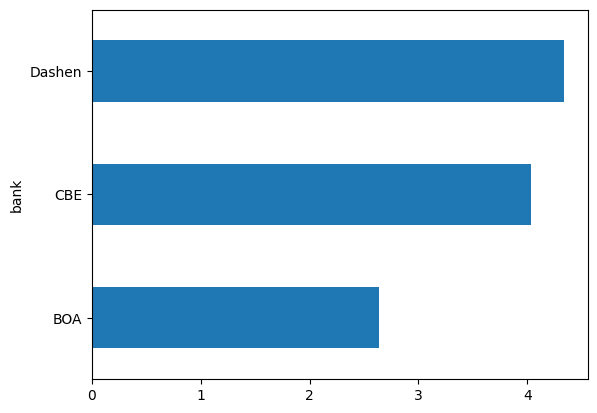

In [5]:
df.groupby('bank')['rating'].mean().plot(kind='barh')

In [6]:
# Group by bank, sentiment_label, and identified_theme, then count occurrences
grouped = df.groupby(['bank', 'identified_theme', 'sentiment_label']).size().unstack(fill_value=0)
grouped['total'] = grouped.sum(axis=1)

# To see the result:
print(grouped.head())

# If you want to reset the index for easier viewing or export:
grouped = grouped.reset_index()

sentiment_label                              negative  neutral  positive  \
bank identified_theme                                                      
BOA  download, want, banking, time, receipt         1        8         0   
     easy, use, wow, fast, simple                   0        4         3   
     good, work, bad, nice, banking                20      227        40   
CBE  dashen, super, easy, fast, banking             0        1         0   
     download, want, banking, time, receipt         0        2         0   

sentiment_label                              total  
bank identified_theme                               
BOA  download, want, banking, time, receipt      9  
     easy, use, wow, fast, simple                7  
     good, work, bad, nice, banking            287  
CBE  dashen, super, easy, fast, banking          1  
     download, want, banking, time, receipt      2  


In [7]:
grouped['total'] = grouped.select_dtypes(include='number').sum(axis=1)
if 'positive' in grouped.columns:
    grouped['positive_ratio'] = grouped['positive'] / grouped['total']
if 'negative' in grouped.columns:
    grouped['negative_ratio'] = grouped['negative'] / grouped['total']

print(grouped.head())

sentiment_label bank                        identified_theme  negative  \
0                BOA  download, want, banking, time, receipt         1   
1                BOA            easy, use, wow, fast, simple         0   
2                BOA          good, work, bad, nice, banking        20   
3                CBE      dashen, super, easy, fast, banking         0   
4                CBE  download, want, banking, time, receipt         0   

sentiment_label  neutral  positive  total  positive_ratio  negative_ratio  
0                      8         0     18        0.000000        0.055556  
1                      4         3     14        0.214286        0.000000  
2                    227        40    574        0.069686        0.034843  
3                      1         0      2        0.000000        0.000000  
4                      2         0      4        0.000000        0.000000  
